# Lab 8: Inferential Modeling

## Name:

---

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Exercise 1

Describe the distribution of the fertility_2018 variable. The fertility_2018 variable represents the number of live births per woman in 2018. A fertility level of 2.1 is called replacement level and represents a level at which the population would remain the same size. Roughly what percent of countries are at or above the replacement level?

---

Type your response here.

In [2]:
sowc_demographics = pd.read_csv("sowc_demographics.csv", na_values='NaN')

sowc_demographics

,countries_and_areas,total_pop_2018,under18_pop_2018,under5_pop_2018,pop_growth_rate_2018,pop_growth_rate_2030,births_2018,fertility_2018,life_expectancy_1970,life_expectancy_2000,life_expectancy_2018,dependency_ratio_total,dependency_ratio_child,dependency_ratio_oldage,percent_urban_2018,pop_urban_growth_rate_2018,pop_urban_growth_rate_2030,migration_rate
0,Afghanistan,37172,18745.0,5601.0,3.2,2.1,1207.0,4.5,37.0,56.0,64.0,84.0,79.0,5.0,25,4.0,3.4,-1.7
1,Albania,2883,635.0,173.0,-0.5,-0.3,34.0,1.6,67.0,74.0,78.0,46.0,26.0,20.0,60,1.6,0.9,-4.9
2,Algeria,42228,14416.0,4951.0,1.7,1.5,1023.0,3.0,50.0,71.0,77.0,58.0,47.0,10.0,73,2.8,2.1,-0.2
3,Andorra,77,NaN,NaN,0.9,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88,0.6,0.1,NaN
4,Angola,30810,16457.0,5553.0,3.5,3.1,1257.0,5.5,41.0,47.0,61.0,96.0,92.0,4.0,66,5.0,4.0,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,Venezuela (Bolivarian Republic of),28887,9527.0,2545.0,1.0,1.3,524.0,2.3,65.0,72.0,72.0,54.0,43.0,11.0,88,1.0,1.3,-22.3
198,Viet Nam,95546,26017.0,7831.0,1.0,0.7,1598.0,2.0,60.0,73.0,75.0,44.0,33.0,10.0,36,3.1,2.5,-0.8
199,Yemen,28499,13183.0,4084.0,2.7,2.0,868.0,3.8,37.0,61.0,66.0,74.0,69.0,5.0,37,4.6,3.6,-1.1
200,Zambia,17352,9033.0,2869.0,2.8,2.8,629.0,4.6,50.0,44.0,64.0,89.0,85.0,4.0,44,4.1,4.1,-0.5


C:\Users\rcampbelliii\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='fertility_2018', ylabel='Count'>

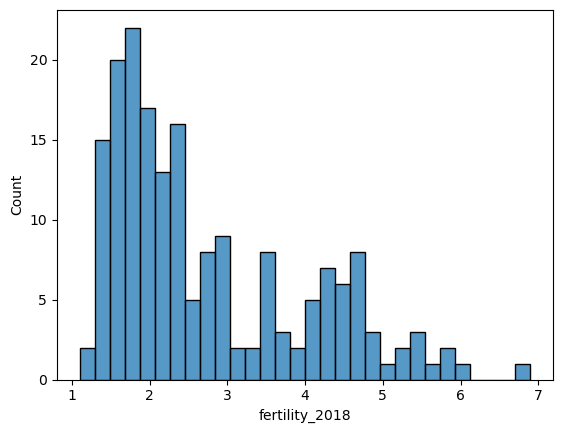

In [3]:
sns.histplot(data=sowc_demographics['fertility_2018'], bins=30)

# Exercise 2

Is there a relationship between life expectancy and fertility? Potentially life_expectancy_2018 is a good predictor of fertility_2018. If so, what is the relationship? Create a linear model and describe the relationship between the variables.

---

Type your response here.

<Axes: xlabel='life_expectancy_2018', ylabel='fertility_2018'>

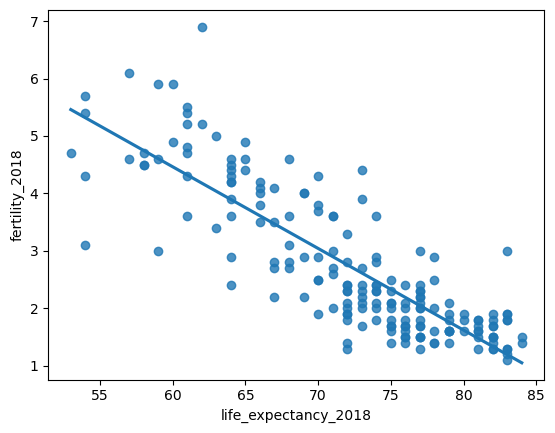

In [4]:
demo_lifefert = pd.DataFrame().assign(life_expectancy_2018=sowc_demographics['life_expectancy_2018'], fertility_2018=sowc_demographics['fertility_2018'])
demo_lifefert_clean = demo_lifefert.dropna(ignore_index=True)

sns.regplot(x='life_expectancy_2018', y='fertility_2018', data=demo_lifefert_clean, ci=None)

In [5]:
model_lr = LinearRegression().fit(demo_lifefert_clean[['life_expectancy_2018']], demo_lifefert_clean.fertility_2018)

print(f"R-squared value: {model_lr.score(demo_lifefert_clean[['life_expectancy_2018']], demo_lifefert_clean.fertility_2018)}")
print(f"Slope: {model_lr.coef_[0]}")
print(f"y-intercept: {model_lr.intercept_}")

print(f"Regression Line Equation: Y = {model_lr.coef_[0]:.2f} * X + {model_lr.intercept_:.2f}")

R-squared value: 0.7093190632584991
Slope: -0.14211156914002285
y-intercept: 12.990987164019042
Regression Line Equation: Y = -0.14 * X + 12.99


# Exercise 3

What do you notice in the graph you have created comparing the 50 simulated linear models and the observed linear models? Based on this, make a guess on whether this observed model is significantly different than expected assuming no linear relationship between the variables.

---

Type your response here.

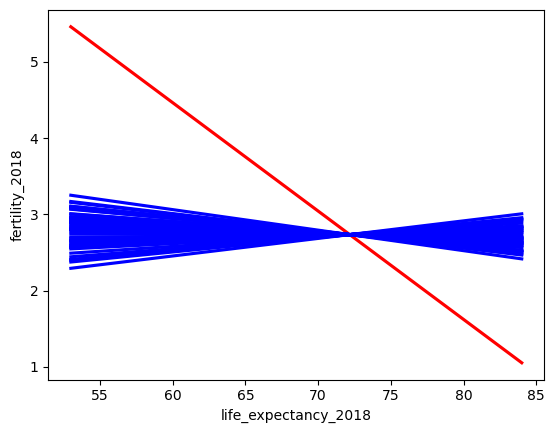

In [6]:
sns.regplot(x='life_expectancy_2018', y='fertility_2018', data=demo_lifefert_clean, ci=None, scatter=False, color='red')

for x in range(50):
    sim_regression = pd.DataFrame().assign(fertility_2018=demo_lifefert_clean['fertility_2018'].sample(frac=1, ignore_index=True), life_expectancy_2018=demo_lifefert_clean['life_expectancy_2018'])
    sns.regplot(x='life_expectancy_2018', y='fertility_2018', data=sim_regression, ci=None, scatter=False, color='blue')

# Exercise 4

Randomly simulate 1000 linear models. Create a histogram of the slopes of these simulated models. Using your histogram, compute a p-value and interpret your results.

---

Type your response here.

The p-value for a two-tailed test from the simulated data is 0.0


C:\Users\rcampbelliii\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


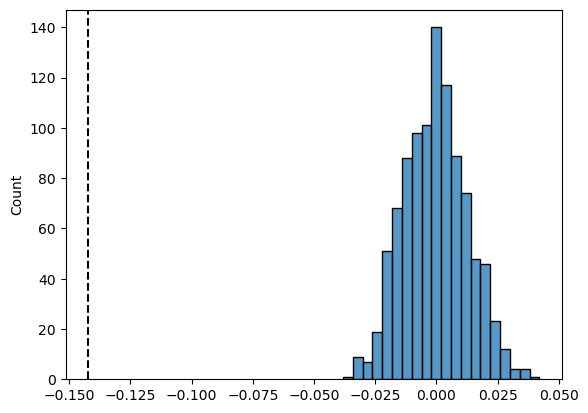

In [7]:
sim_slopes = []

for x in range(1000):
    sim_regression = pd.DataFrame().assign(fertility_2018=demo_lifefert_clean['fertility_2018'].sample(frac=1, ignore_index=True), life_expectancy_2018=demo_lifefert_clean['life_expectancy_2018'])
    sim_model_lr = LinearRegression().fit(sim_regression[['life_expectancy_2018']], sim_regression.fertility_2018)
    sim_slopes.append(sim_model_lr.coef_[0])

ax = sns.histplot(data=sim_slopes, bins=20)
ax.axvline(x = model_lr.coef_[0], ymin = 0, ymax = 1, color = "black", linestyle = "dashed")

print("The p-value for a two-tailed test from the simulated data is", 2*len([i for i in sim_slopes if i < model_lr.coef_[0]]) / len(sim_slopes))

# Exercise 5

Bootstrap 5000 slopes and create a histogram of those bootstrapped slopes. Compute a confidence interval from your histogram.

---

Type your response below.

The 95% confidence interval from bootstrapping is: [ -0.15587904637021224 , -0.12939146178138586 ]


C:\Users\rcampbelliii\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


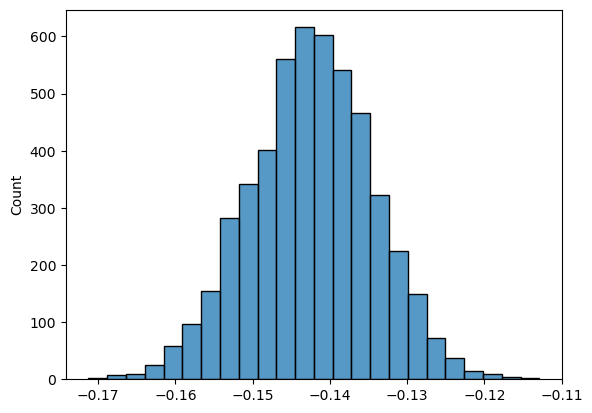

In [8]:
bootstrap_slopes = []

for x in range(5000):
    sim_regression = demo_lifefert_clean.sample(frac=1, ignore_index=True, replace=True)
    sim_model_lr = LinearRegression().fit(sim_regression[['life_expectancy_2018']], sim_regression.fertility_2018)
    bootstrap_slopes.append(sim_model_lr.coef_[0])

bootstrap_slopes.sort()
ax = sns.histplot(data=bootstrap_slopes, bins=24)
print("The 95% confidence interval from bootstrapping is: [", bootstrap_slopes[int(0.05*len(bootstrap_slopes))], ",", bootstrap_slopes[int(0.95*len(bootstrap_slopes))], "]")

# Exercise 6

Using the techniques from lab 3, create a linear regression model to predict fertility using the multiple predictors: life_expectancy_2018, migration_rate, percent_urban_2018, births_2018, and dependency_ratio_total. Do you think this model predicts fertility rates better than the model above? Why or why not?

---

Type your response below.

In [9]:
demo_mult = sowc_demographics.filter(['fertility_2018', 'life_expectancy_2018', 'migration_rate', 'percent_urban_2018', 'births_2018', 'dependency_ratio_total'])
demo_mult_clean = demo_mult.dropna(ignore_index=True)

mult_model_lr = LinearRegression()
X=demo_mult_clean.drop(columns=['fertility_2018'])
mult_model_lr.fit(X, demo_mult_clean['fertility_2018'])

for i, x in enumerate(list(X)):
    print(f"slope for {x} is {mult_model_lr.coef_[i]:.4f}")

print(f"R squared value for model is {mult_model_lr.score(X, demo_mult_clean['fertility_2018'])}")

slope for life_expectancy_2018 is -0.0718
slope for migration_rate is 0.0296
slope for percent_urban_2018 is 0.0004
slope for births_2018 is -0.0000
slope for dependency_ratio_total is 0.0483
R squared value for model is 0.9022297923144124


# Exercise 7

Compare the spread of residuals between the two models. In which model are the errors more spread out? Note the scale of the y-axis might be different between the two graphs. Based on this, which model do you think is better at predicting fertility?

---

Type your response here.

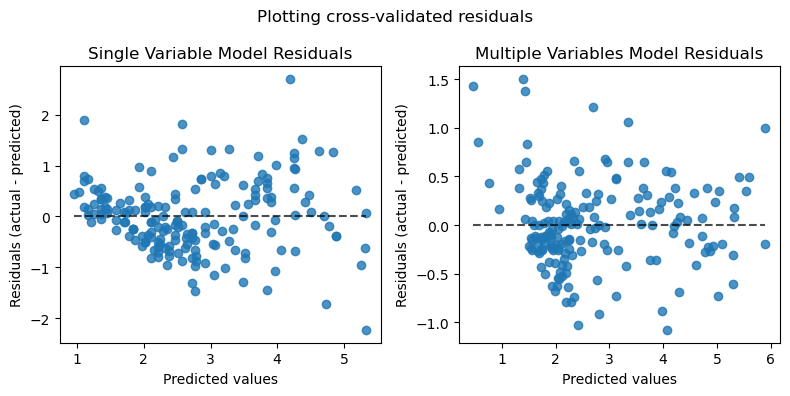

In [10]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import PredictionErrorDisplay

y_pred_single = cross_val_predict(model_lr, demo_lifefert_clean[['life_expectancy_2018']], demo_lifefert_clean['fertility_2018'], cv=4)
y_pred_mult = cross_val_predict(mult_model_lr, X, demo_mult_clean['fertility_2018'], cv=4)

fig, axs = plt.subplots(ncols=2, figsize=(8, 4))
PredictionErrorDisplay.from_predictions(y_true=demo_lifefert_clean['fertility_2018'], y_pred=y_pred_single, ax=axs[0])
axs[0].set_title("Single Variable Model Residuals")
PredictionErrorDisplay.from_predictions(y_true=demo_mult_clean['fertility_2018'], y_pred=y_pred_mult, ax=axs[1])
axs[1].set_title("Multiple Variables Model Residuals")
fig.suptitle("Plotting cross-validated residuals")
plt.tight_layout()
plt.show()

# Exercise 8

Based on the results of the cross-validation SSE, which model appears to better predict fertility?

---

Type your response here.

In [11]:
from sklearn.metrics import mean_squared_error

sse_single = len(demo_lifefert_clean['fertility_2018'])*mean_squared_error(demo_lifefert_clean['fertility_2018'], y_pred_single)
sse_mult = len(demo_mult_clean['fertility_2018'])*mean_squared_error(demo_mult_clean['fertility_2018'], y_pred_mult)

print("The cross-validation sum of squared error for the single predictor model is", sse_single)
print("The cross-validation sum of squared error for the multiple predictor model is", sse_mult)

The cross-validation sum of squared error for the single predictor model is 89.35365607174214
The cross-validation sum of squared error for the multiple predictor model is 35.2483926804111


# Exercise 9

Using whichever variables you would like, try to create a model that seems to predict fertility better than the models created above. Explain why you chose the variables you did and why you think they will be useful in predicting fertility.

---

Type your response here.